# Usage (quick version)
This is a quick tour of CovsirPhy. Details of datasets and scenario analysis will be explained.

## Preparation
Prepare the packages.

In [1]:
# Standard users
# !pip install covsirphy

In [2]:
# Developers (Note: this notebook is in example directory)
import os
os.chdir("../")

In [3]:
import covsirphy as cs
cs.__version__

'2.9.1'

## Dataset preparation
Download the datasets to "input" direcotry and load them.

If "input" directory has the datasets, `DataLoader` will load the local files. If the datasets were updated in remote servers, `DataLoader` will update the local files automatically.
Download the datasets to "input" direcotry and load them.

If "input" directory has the datasets, `DataLoader` will load the local files. If the datasets were updated in remote servers, `DataLoader` will update the local files automatically.

In [4]:
data_loader = cs.DataLoader("input")
# The number of cases (JHU style)
jhu_data = data_loader.jhu(verbose=True)
# Population in each country
population_data = data_loader.population(verbose=True)
# Government Response Tracker (OxCGRT)
oxcgrt_data = data_loader.oxcgrt(verbose=True)

Retrieving datasets from COVID-19 Data Hub: https://covid19datahub.io/



Detailed citaition list:
Open Government Data, United Kingdom (2020), https://coronavirus.data.gov.uk
Department of Disease Control of Thailand (2020), https://covid19.th-stat.com/
World Health Organization (2020), https://covid19.who.int
Ireland Health Protection Surveillance Centre (HPSC) and Health Service Executive (HSE) (2020), https://covid19ireland-geohive.hub.arcgis.com/
The COVID Tracking Project (2020), https://covidtracking.com
Ministry of Health of Croatia (2020), https://data.gov.hr/dataset/koronavirus/resource/08fab529-ebba-46c7-be79-05782ddb02ef
Open Government Data, Latvia (2020), https://data.gov.lv/dati/dataset
Taiwan Ministry of Health and Welfare (2020), https://data.gov.tw/dataset/120451
Wikipedia (2020), https://en.wikipedia.org/wiki
Epistat, Belgian Infectious Diseases (2020), https://epistat.sciensano.be
Johns Hopkins Center for Systems Science and Engineering (2020), https://github.com/CSSEGISandData/COVID-19
Covid19data.com.au (2020), https://github.com/M3IT/

### The number of cases (JHU style)
The main dataset is that of the number of cases. This includes "Confirmed", "Infected", "Recovered" and "Fatal". "Infected" was calculated as "Confirmed - Recovered - Fatal".

In [5]:
# Description/citation
print(jhu_data.citation)

(Secondary source) Guidotti, E., Ardia, D., (2020), "COVID-19 Data Hub", Journal of Open Source Software 5(51):2376, doi: 10.21105/joss.02376.
We can get Citation list of primary sources with DataLoader(...).covid19dh_citation


In [6]:
# Citation of COVID-19 Data Hub: this was shown when `DataLoader.jhu(verbose=True)
# print(data_loader.covid19dh_citation)

In [7]:
# Raw data
jhu_data.raw.tail()

,ObservationDate,Confirmed,Recovered,Deaths,Population,ISO3,Province/State,Country/Region,school_closing,workplace_closing,cancel_events,gatherings_restrictions,transport_closing,stay_home_restrictions,internal_movement_restrictions,international_movement_restrictions,information_campaigns,testing_policy,contact_tracing,stringency_index
280758,2020-10-22,14,14,0,107808.0,COL,Vichada,Colombia,3,1,2,3,1,1,1,4,2,2,0,71.3
280759,2020-10-23,14,14,0,107808.0,COL,Vichada,Colombia,3,1,2,3,1,1,1,4,2,2,0,71.3
280760,2020-10-24,14,14,0,107808.0,COL,Vichada,Colombia,3,1,2,3,1,1,1,4,2,2,0,71.3
280761,2020-10-25,14,14,0,107808.0,COL,Vichada,Colombia,3,1,2,3,1,1,1,4,2,2,0,71.3
280762,2020-10-26,14,14,0,107808.0,COL,Vichada,Colombia,3,1,2,3,1,1,1,4,2,2,0,71.3


In [8]:
# Cleaned data
jhu_data.cleaned().tail()

,Date,Country,Province,Confirmed,Infected,Fatal,Recovered
280758,2020-10-22,Colombia,Vichada,14,0,0,14
280759,2020-10-23,Colombia,Vichada,14,0,0,14
280760,2020-10-24,Colombia,Vichada,14,0,0,14
280761,2020-10-25,Colombia,Vichada,14,0,0,14
280762,2020-10-26,Colombia,Vichada,14,0,0,14


In [9]:
# Subset for a country
jhu_data.subset("Japan", province="Tokyo").tail()

,Date,Confirmed,Infected,Fatal,Recovered
217,2020-10-22,29520,1851,442,27227
218,2020-10-23,29706,1806,445,27455
219,2020-10-24,29909,1838,445,27626
220,2020-10-25,30033,1777,447,27809
221,2020-10-26,30135,1796,450,27889


In [10]:
# Total
total_df = jhu_data.total()
total_df.tail()

,Confirmed,Infected,Fatal,Recovered,Fatal per Confirmed,Recovered per Confirmed,Fatal per (Fatal or Recovered)
Date,,,,,,,
2020-10-22,41270373,12287514,1128062,27854797,0.013667,0.337467,0.038922
2020-10-23,41756515,12574365,1134886,28047264,0.013589,0.335843,0.038890
2020-10-24,42192265,12801848,1140421,28249996,0.013515,0.334777,0.038802
2020-10-25,42551581,12965057,1144097,28442427,0.013444,0.334211,0.038670
2020-10-26,42552153,12963960,1144110,28444083,0.013444,0.334226,0.038668


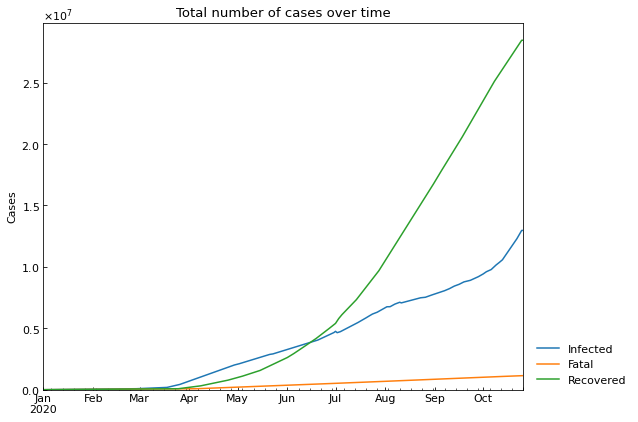

In [11]:
# Plot the total values
cs.line_plot(total_df[["Infected", "Fatal", "Recovered"]], "Total number of cases over time")

### (Optional) Replace the dataset in Japan
If we have dataset for each country, we can use it optionally.

In [12]:
# Registered data in jhu_data
jhu_data.subset("Japan").tail()

,Date,Confirmed,Infected,Fatal,Recovered
256,2020-10-22,95139,5800,1697,87642
257,2020-10-23,95887,5958,1709,88220
258,2020-10-24,96617,6142,1713,88762
259,2020-10-25,97112,6159,1719,89234
260,2020-10-26,97521,6113,1727,89681


In [13]:
# Download the dataset in Japan and show the citation
japan_data = data_loader.japan()
print(japan_data.citation)

Lisphilar (2020), COVID-19 dataset in Japan, GitHub repository, https://github.com/lisphilar/covid19-sir/data/japan


In [14]:
# Replace the dataset for Japan
jhu_data.replace(japan_data)
# Show the new records in Japan
jhu_data.subset("Japan").tail()

,Date,Confirmed,Infected,Fatal,Recovered
254,2020-10-22,94524,5173,1685,87666
255,2020-10-23,95138,5199,1694,88245
256,2020-10-24,95835,5342,1706,88787
257,2020-10-25,96534,5541,1711,89282
258,2020-10-26,97074,5647,1718,89709


### Population in each country
Population values are necessary to calculate the number of susceptible people. Susceptible is a variable of SIR-derived models.

In [15]:
# Description/citation
print(population_data.citation)

(Secondary source) Guidotti, E., Ardia, D., (2020), "COVID-19 Data Hub", Journal of Open Source Software 5(51):2376, doi: 10.21105/joss.02376.
We can get Citation list of primary sources with DataLoader(...).covid19dh_citation


In [16]:
# Raw data (the same as jhu_data)
population_data.raw.tail()

,ObservationDate,Confirmed,Recovered,Deaths,Population,ISO3,Province/State,Country/Region,school_closing,workplace_closing,cancel_events,gatherings_restrictions,transport_closing,stay_home_restrictions,internal_movement_restrictions,international_movement_restrictions,information_campaigns,testing_policy,contact_tracing,stringency_index
280758,2020-10-22,14,14,0,107808.0,COL,Vichada,Colombia,3,1,2,3,1,1,1,4,2,2,0,71.3
280759,2020-10-23,14,14,0,107808.0,COL,Vichada,Colombia,3,1,2,3,1,1,1,4,2,2,0,71.3
280760,2020-10-24,14,14,0,107808.0,COL,Vichada,Colombia,3,1,2,3,1,1,1,4,2,2,0,71.3
280761,2020-10-25,14,14,0,107808.0,COL,Vichada,Colombia,3,1,2,3,1,1,1,4,2,2,0,71.3
280762,2020-10-26,14,14,0,107808.0,COL,Vichada,Colombia,3,1,2,3,1,1,1,4,2,2,0,71.3


In [17]:
# Cleaned data
population_data.cleaned().tail()

,ISO3,Country,Province,Date,Population
237697,COL,Colombia,Vichada,2020-10-22,107808
237698,COL,Colombia,Vichada,2020-10-23,107808
237699,COL,Colombia,Vichada,2020-10-24,107808
237700,COL,Colombia,Vichada,2020-10-25,107808
237701,COL,Colombia,Vichada,2020-10-26,107808


In [18]:
population_data.value("Japan", province=None)

126529100

In [19]:
# Register population value of Tokyo in Japan
# https://www.metro.tokyo.lg.jp/tosei/hodohappyo/press/2020/06/11/07.html
population_data.update(14_002_973, "Japan", province="Tokyo")
population_data.value("Japan", province="Tokyo")

14002973

### Government Response Tracker (OxCGRT)
This will be used in [Usage (details: policy measures)](https://lisphilar.github.io/covid19-sir/usage_policy.html).

In [20]:
# Description/citation
print(oxcgrt_data.citation)

(Secondary source) Guidotti, E., Ardia, D., (2020), "COVID-19 Data Hub", Journal of Open Source Software 5(51):2376, doi: 10.21105/joss.02376.
We can get Citation list of primary sources with DataLoader(...).covid19dh_citation


In [21]:
# Raw data (the same as jhu_data)
oxcgrt_data.raw.tail()

,ObservationDate,Confirmed,Recovered,Deaths,Population,ISO3,Province/State,Country/Region,school_closing,workplace_closing,cancel_events,gatherings_restrictions,transport_closing,stay_home_restrictions,internal_movement_restrictions,international_movement_restrictions,information_campaigns,testing_policy,contact_tracing,stringency_index
280758,2020-10-22,14,14,0,107808.0,COL,Vichada,Colombia,3,1,2,3,1,1,1,4,2,2,0,71.3
280759,2020-10-23,14,14,0,107808.0,COL,Vichada,Colombia,3,1,2,3,1,1,1,4,2,2,0,71.3
280760,2020-10-24,14,14,0,107808.0,COL,Vichada,Colombia,3,1,2,3,1,1,1,4,2,2,0,71.3
280761,2020-10-25,14,14,0,107808.0,COL,Vichada,Colombia,3,1,2,3,1,1,1,4,2,2,0,71.3
280762,2020-10-26,14,14,0,107808.0,COL,Vichada,Colombia,3,1,2,3,1,1,1,4,2,2,0,71.3


In [22]:
# Cleaned data
oxcgrt_data.cleaned().tail()

,Date,Country,ISO3,School_closing,Workplace_closing,Cancel_events,Gatherings_restrictions,Transport_closing,Stay_home_restrictions,Internal_movement_restrictions,International_movement_restrictions,Information_campaigns,Testing_policy,Contact_tracing,Stringency_index
280758,2020-10-22,Colombia,COL,3,1,2,3,1,1,1,4,2,2,0,71.3
280759,2020-10-23,Colombia,COL,3,1,2,3,1,1,1,4,2,2,0,71.3
280760,2020-10-24,Colombia,COL,3,1,2,3,1,1,1,4,2,2,0,71.3
280761,2020-10-25,Colombia,COL,3,1,2,3,1,1,1,4,2,2,0,71.3
280762,2020-10-26,Colombia,COL,3,1,2,3,1,1,1,4,2,2,0,71.3


In [23]:
# Subset for a country
oxcgrt_data.subset("Japan").tail()

,Date,School_closing,Workplace_closing,Cancel_events,Gatherings_restrictions,Transport_closing,Stay_home_restrictions,Internal_movement_restrictions,International_movement_restrictions,Information_campaigns,Testing_policy,Contact_tracing,Stringency_index
295,2020-10-22,0,1,1,0,0,1,1,3,2,2,1,35.19
296,2020-10-23,0,1,1,0,0,1,1,3,2,2,1,35.19
297,2020-10-24,0,1,1,0,0,1,1,3,2,2,1,35.19
298,2020-10-25,0,1,1,0,0,1,1,3,2,2,1,35.19
299,2020-10-26,0,1,1,0,0,1,1,3,2,2,1,35.19


In [24]:
# Subset for a country (using ISO3 code)
oxcgrt_data.subset("JPN").tail()

,Date,School_closing,Workplace_closing,Cancel_events,Gatherings_restrictions,Transport_closing,Stay_home_restrictions,Internal_movement_restrictions,International_movement_restrictions,Information_campaigns,Testing_policy,Contact_tracing,Stringency_index
295,2020-10-22,0,1,1,0,0,1,1,3,2,2,1,35.19
296,2020-10-23,0,1,1,0,0,1,1,3,2,2,1,35.19
297,2020-10-24,0,1,1,0,0,1,1,3,2,2,1,35.19
298,2020-10-25,0,1,1,0,0,1,1,3,2,2,1,35.19
299,2020-10-26,0,1,1,0,0,1,1,3,2,2,1,35.19


## Scenario analysis
As an example, we will analysis the number of cases in Japan.

In [25]:
snl = cs.Scenario(jhu_data, population_data, country="Japan", province=None)

### Check records
Let's see the records at first. `Scenario.records()` method return the records as a pandas dataframe and show a line plot.

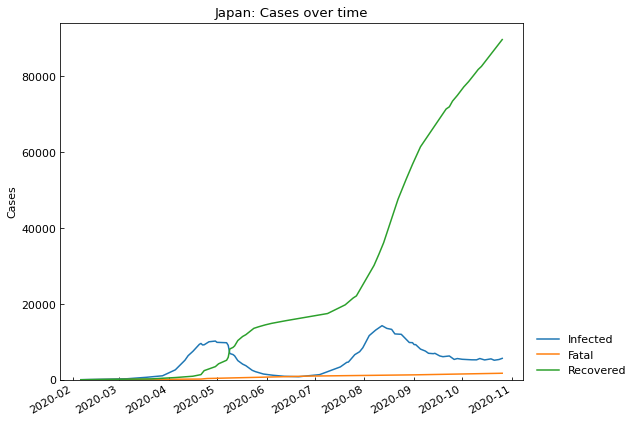

,Date,Confirmed,Infected,Fatal,Recovered
254,2020-10-22,94524,5173,1685,87666
255,2020-10-23,95138,5199,1694,88245
256,2020-10-24,95835,5342,1706,88787
257,2020-10-25,96534,5541,1711,89282
258,2020-10-26,97074,5647,1718,89709


In [26]:
record_df = snl.records()
record_df.tail()

### S-R trend analysis
S-R trend analysis finds the change points of SIR-derived ODE parameters. Details will be explained in [Usage (details: phases)](https://lisphilar.github.io/covid19-sir/usage_phases.html).

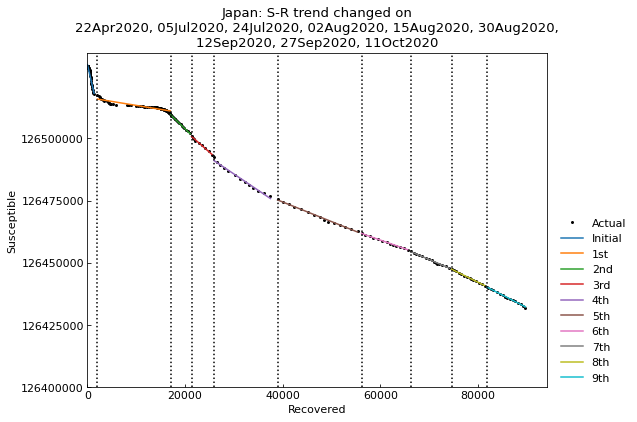

,Type,Start,End,Population
0th,Past,06Feb2020,21Apr2020,126529100
1st,Past,22Apr2020,04Jul2020,126529100
2nd,Past,05Jul2020,23Jul2020,126529100
3rd,Past,24Jul2020,01Aug2020,126529100
4th,Past,02Aug2020,14Aug2020,126529100
5th,Past,15Aug2020,29Aug2020,126529100
6th,Past,30Aug2020,11Sep2020,126529100
7th,Past,12Sep2020,26Sep2020,126529100
8th,Past,27Sep2020,10Oct2020,126529100
9th,Past,11Oct2020,26Oct2020,126529100


In [27]:
# Perform S-R trend analysis and set phases
snl.trend(set_phases=True)
snl.summary()

### Hyperparameter estimation of ODE models
Here, we will estimate the parameter values of SIR-derived models. As an example, we use SIR-F model. Details of models will be explained in [Usage (details: theoritical datasets)](https://lisphilar.github.io/covid19-sir/usage_theoretical.html).

In [28]:
# Estimate the parameter values of SIR-F model
snl.estimate(cs.SIRF)


<SIR-F model: parameter estimation>
Running optimization with 4 CPUs...


	 9th phase (11Oct2020 - 26Oct2020): finished 1514 trials in 1 min  1 sec


	 3rd phase (24Jul2020 - 01Aug2020): finished 1041 trials in 0 min 35 sec

	 2nd phase (05Jul2020 - 23Jul2020): finished 1576 trials in 1 min  0 sec

	 0th phase (06Feb2020 - 21Apr2020): finished 1489 trials in 1 min  0 sec

	 1st phase (22Apr2020 - 04Jul2020): finished 1492 trials in 1 min  0 sec

	 6th phase (30Aug2020 - 11Sep2020): finished  172 trials in 0 min  5 sec

	 7th phase (12Sep2020 - 26Sep2020): finished  178 trials in 0 min  5 sec

	 8th phase (27Sep2020 - 10Oct2020): finished  203 trials in 0 min  5 sec

	 5th phase (15Aug2020 - 29Aug2020): finished  547 trials in 0 min 15 sec

	 4th phase (02Aug2020 - 14Aug2020): finished 1671 trials in 1 min  0 sec

Completed optimization. Total: 2 min 37 sec


In [29]:
# Show the sumamry of parameter estimation
snl.summary()

,Type,Start,End,Population,ODE,Rt,theta,kappa,rho,sigma,tau,1/gamma [day],1/alpha2 [day],1/beta [day],alpha1 [-],RMSLE,Trials,Runtime
0th,Past,06Feb2020,21Apr2020,126529100,SIR-F,4.66,0.018341,0.000174,0.104200,0.021769,1440,45,5760,9,0.018,0.937856,1489,1 min 0 sec
1st,Past,22Apr2020,04Jul2020,126529100,SIR-F,0.39,0.080586,0.000941,0.029768,0.069508,1440,14,1062,33,0.081,0.883456,1492,1 min 0 sec
2nd,Past,05Jul2020,23Jul2020,126529100,SIR-F,1.95,0.000552,0.000197,0.143925,0.073569,1440,13,5087,6,0.001,0.032712,1576,1 min 0 sec
3rd,Past,24Jul2020,01Aug2020,126529100,SIR-F,1.84,0.000726,0.000120,0.134241,0.072807,1440,13,8341,7,0.001,0.019265,1041,0 min 35 sec
4th,Past,02Aug2020,14Aug2020,126529100,SIR-F,1.56,0.000494,0.000344,0.102605,0.065240,1440,15,2906,9,0.000,0.062235,1671,1 min 0 sec
5th,Past,15Aug2020,29Aug2020,126529100,SIR-F,0.79,0.000314,0.000955,0.075042,0.093459,1440,10,1047,13,0.000,0.023830,547,0 min 15 sec
6th,Past,30Aug2020,11Sep2020,126529100,SIR-F,0.71,0.021704,0.000067,0.065618,0.090462,1440,11,14835,15,0.022,0.021777,172,0 min 5 sec
7th,Past,12Sep2020,26Sep2020,126529100,SIR-F,0.86,0.016901,0.000002,0.082774,0.094976,1440,10,533488,12,0.017,0.029599,178,0 min 5 sec
8th,Past,27Sep2020,10Oct2020,126529100,SIR-F,0.98,0.002629,0.000996,0.097175,0.098191,1440,10,1003,10,0.003,0.015345,203,0 min 5 sec
9th,Past,11Oct2020,26Oct2020,126529100,SIR-F,0.97,0.000242,0.000976,0.099583,0.101313,1440,9,1024,10,0.000,0.026354,1514,1 min 1 sec


### Accuracy of estimation

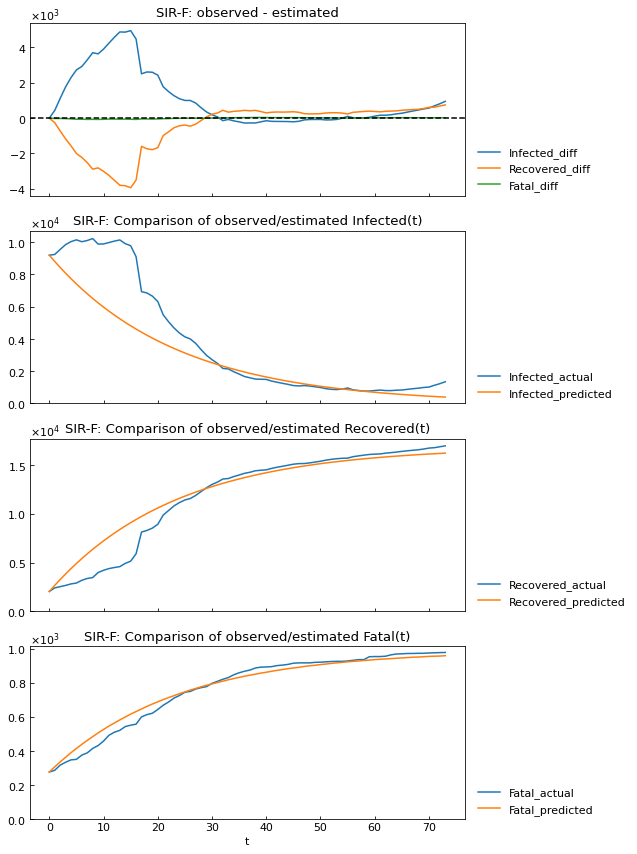

In [30]:
snl.estimate_accuracy(phase="1st")

### Get parameter value

In [31]:
snl.get("Rt", phase="4th")

1.56

### Show parameter history

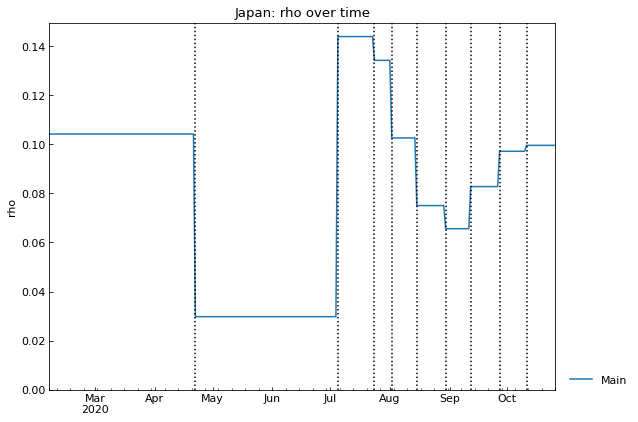

In [32]:
_ = snl.history(target="rho")

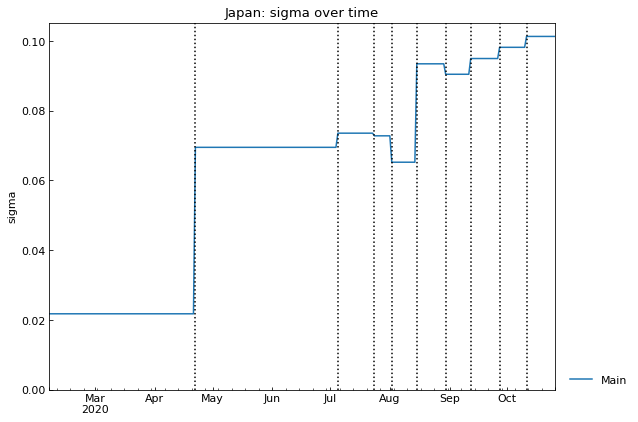

In [33]:
_ = snl.history(target="sigma")

### Show the history of reproduction number

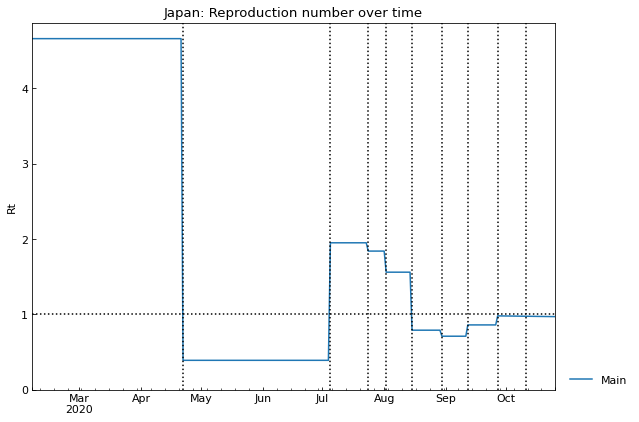

In [34]:
_ = snl.history(target="Rt")

### Simulate the number of cases

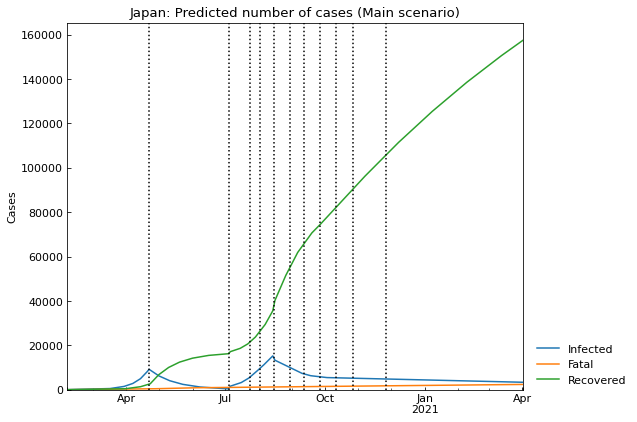

,Date,Confirmed,Fatal,Infected,Recovered
417,2021-03-29,161940,2360,3384,156196
418,2021-03-30,162277,2364,3375,156538
419,2021-03-31,162612,2367,3365,156880
420,2021-04-01,162946,2370,3356,157220
421,2021-04-02,163280,2374,3346,157560


In [35]:
snl.clear(name="Main")
snl.add(days=30)
snl.add(end_date="01Apr2021", name="Main")
main_sim_df = snl.simulate(name="Main")
main_sim_df.tail()

### Simulate another scenario
If $\sigma$ will be double in 30 days, how many cases will be?

In [36]:
sigma_current = snl.get("sigma", name="Main", phase="last")
sigma_current

0.10131325607052222

In [37]:
sigma_new = sigma_current * 2
sigma_new

0.20262651214104443

In [38]:
snl.clear(name="Medicine")
snl.add(name="Medicine", days=30, sigma=sigma_current)
snl.add(name="Medicine", end_date="01Apr2021", sigma=sigma_new)
snl.summary()

Type      Start        End  Population    ODE    Rt  \
Scenario Phase                                                          
Main     0th      Past  06Feb2020  21Apr2020   126529100  SIR-F  4.66   
         1st      Past  22Apr2020  04Jul2020   126529100  SIR-F  0.39   
         2nd      Past  05Jul2020  23Jul2020   126529100  SIR-F  1.95   
         3rd      Past  24Jul2020  01Aug2020   126529100  SIR-F  1.84   
         4th      Past  02Aug2020  14Aug2020   126529100  SIR-F  1.56   
         5th      Past  15Aug2020  29Aug2020   126529100  SIR-F  0.79   
         6th      Past  30Aug2020  11Sep2020   126529100  SIR-F  0.71   
         7th      Past  12Sep2020  26Sep2020   126529100  SIR-F  0.86   
         8th      Past  27Sep2020  10Oct2020   126529100  SIR-F  0.98   
         9th      Past  11Oct2020  26Oct2020   126529100  SIR-F  0.97   
         10th   Future  27Oct2020  25Nov2020   126529100  SIR-F  0.97   
         11th   Future  26Nov2020  01Apr2021   126529100  SIR-F  0.97   
Medicine 0th      Past  06Feb2020  21Apr2020   126529100  SIR-F  4.66   
         1st      Past  22Apr2020  04Jul2020   126529100  SIR-F  0.39   
         2nd      Past  05Jul2020  23Jul2020   126529100  SIR-F  1.95   
         3rd      Past  24Jul2020  01Aug2020   126529100  SIR-F  1.84   
         4th      Past  02Aug2020  14Aug2020   126529100  SIR-F  1.56   
         5th      Past  15Aug2020  29Aug2020   126529100  SIR-F  0.79   
         6th      Past  30Aug2020  11Sep2020   126529100  SIR-F  0.71   
         7th      Past  12Sep2020  26Sep2020   126529100  SIR-F  0.86   
         8th      Past  27Sep2020  10Oct2020   126529100  SIR-F  0.98   
         9th      Past  11Oct2020  26Oct2020   126529100  SIR-F  0.97   
         10th   Future  27Oct2020  25Nov2020   126529100  SIR-F  0.97   
         11th   Future  26Nov2020  01Apr2021   126529100  SIR-F  0.49   

                   theta     kappa       rho     sigma   tau  1/gamma [day]  \
Scenario Phase                                                                
Main     0th    0.018341  0.000174  0.104200  0.021769  1440             45   
         1st    0.080586  0.000941  0.029768  0.069508  1440             14   
         2nd    0.000552  0.000197  0.143925  0.073569  1440             13   
         3rd    0.000726  0.000120  0.134241  0.072807  1440             13   
         4th    0.000494  0.000344  0.102605  0.065240  1440             15   
         5th    0.000314  0.000955  0.075042  0.093459  1440             10   
         6th    0.021704  0.000067  0.065618  0.090462  1440             11   
         7th    0.016901  0.000002  0.082774  0.094976  1440             10   
         8th    0.002629  0.000996  0.097175  0.098191  1440             10   
         9th    0.000242  0.000976  0.099583  0.101313  1440              9   
         10th   0.000242  0.000976  0.099583  0.101313  1440              9   
         11th   0.000242  0.000976  0.099583  0.101313  1440              9   
Medicine 0th    0.018341  0.000174  0.104200  0.021769  1440             45   
         1st    0.080586  0.000941  0.029768  0.069508  1440             14   
         2nd    0.000552  0.000197  0.143925  0.073569  1440             13   
         3rd    0.000726  0.000120  0.134241  0.072807  1440             13   
         4th    0.000494  0.000344  0.102605  0.065240  1440             15   
         5th    0.000314  0.000955  0.075042  0.093459  1440             10   
         6th    0.021704  0.000067  0.065618  0.090462  1440             11   
         7th    0.016901  0.000002  0.082774  0.094976  1440             10   
         8th    0.002629  0.000996  0.097175  0.098191  1440             10   
         9th    0.000242  0.000976  0.099583  0.101313  1440              9   
         10th   0.000242  0.000976  0.099583  0.101313  1440              9   
         11th   0.000242  0.000976  0.099583  0.202627  1440              4   

                1/alpha2 [day]  1/beta [day]  alpha1 [-]      RM

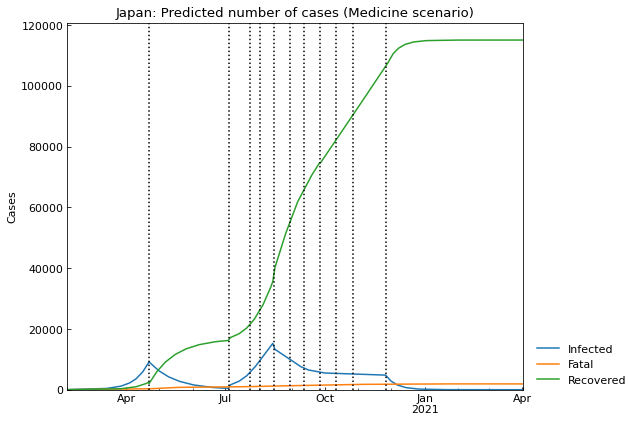

,Date,Confirmed,Fatal,Infected,Recovered
417,2021-03-29,116945,1908,0,115037
418,2021-03-30,116945,1908,0,115037
419,2021-03-31,116945,1908,0,115037
420,2021-04-01,116945,1908,0,115037
421,2021-04-02,116945,1908,0,115037


In [39]:
snl.simulate(name="Medicine").tail()

### Compare the scenarios
We will compare the scenarios with representative values, reproduction number and parameter values.

In [40]:
snl.describe()

,max(Infected),argmax(Infected),Confirmed on 02Apr2021,Infected on 02Apr2021,Fatal on 02Apr2021,11th_Rt
Main,15222,14Aug2020,163280,3346,2374,0.97
Medicine,15222,14Aug2020,116945,0,1908,0.49


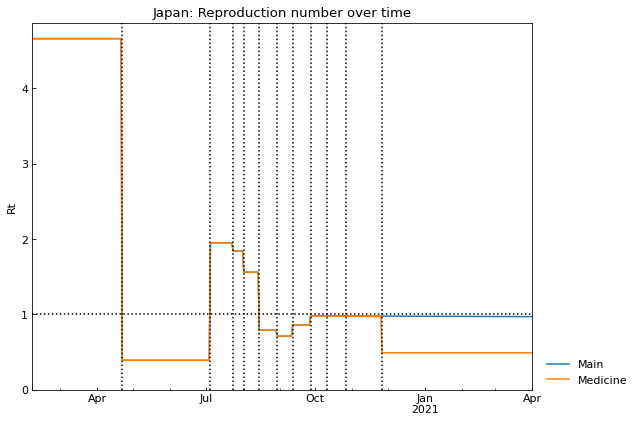

In [41]:
_ = snl.history(target="Rt")

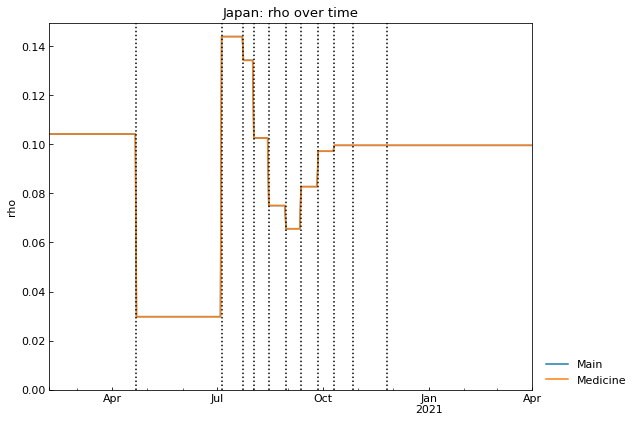

In [42]:
_ = snl.history(target="rho")

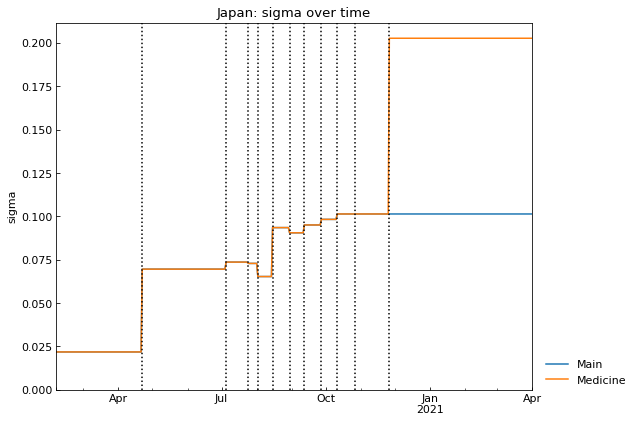

In [43]:
_ = snl.history(target="sigma")

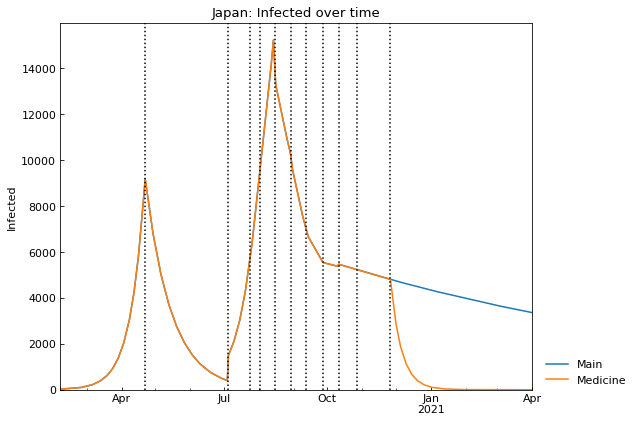

In [44]:
_ = snl.history(target="Infected")

### Change rate of parameters in main scenario
History of each parameter will be shown. Values will be divided by the values in 0th phase.

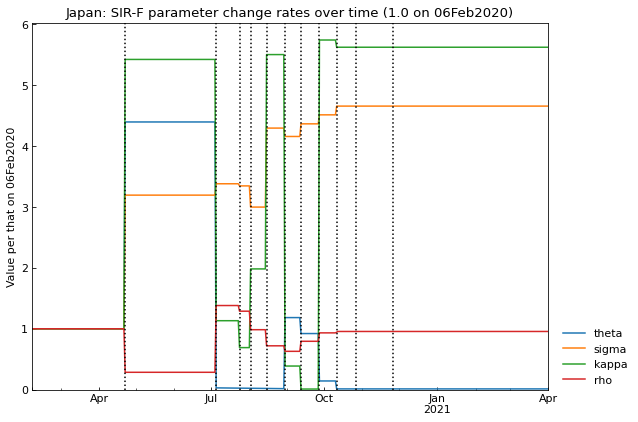

In [45]:
_ = snl.history_rate(name="Main")

## Retrospective analysis
We can evaluate the impact of measures using past records. How many people were infected if the parameter values have not changed sinse 01Sep2020?

In [46]:
# Perform retrospective analysis
snl_retro = cs.Scenario(jhu_data, population_data, "Japan")
snl_retro.retrospective("01Sep2020", model=cs.SIRF, control="Main", target="Retrospective")


<SIR-F model: parameter estimation>
Running optimization with 4 CPUs...


	10th phase (11Oct2020 - 26Oct2020): finished 1318 trials in 1 min  0 sec


	 3rd phase (24Jul2020 - 01Aug2020): finished 1017 trials in 0 min 45 sec

	 2nd phase (05Jul2020 - 23Jul2020): finished 1287 trials in 1 min  0 sec

	 1st phase (22Apr2020 - 04Jul2020): finished 1258 trials in 1 min  0 sec

	 0th phase (06Feb2020 - 21Apr2020): finished 1244 trials in 1 min  0 sec

	 6th phase (30Aug2020 - 31Aug2020): finished  215 trials in 0 min  5 sec

	 7th phase (01Sep2020 - 11Sep2020): finished  166 trials in 0 min  5 sec

	 9th phase (27Sep2020 - 10Oct2020): finished  150 trials in 0 min  5 sec

	 5th phase (15Aug2020 - 29Aug2020): finished  443 trials in 0 min 15 sec

	 8th phase (12Sep2020 - 26Sep2020): finished  308 trials in 0 min 10 sec

	 4th phase (02Aug2020 - 14Aug2020): finished 1540 trials in 1 min  0 sec

Completed optimization. Total: 2 min 47 sec



<SIR-F model: parameter estimation>
Running optimization with 4 CPUs...


	 7th phase (01Sep2020 - 26Oct2020): finished 5170 trials in 1 min  0 sec

Completed optimization. Total: 1 min  0 sec


In [47]:
# Show the summary of estimation
cols = ["Start", "End", "ODE", "Rt", *cs.SIRF.PARAMETERS] + ["RMSLE", "Trials", "Runtime"]
snl_retro.summary(columns=cols)

Start        End    ODE    Rt     theta     kappa  \
Scenario      Phase                                                          
Main          0th    06Feb2020  21Apr2020  SIR-F  4.66  0.018341  0.000174   
              1st    22Apr2020  04Jul2020  SIR-F  0.36  0.109215  0.000403   
              2nd    05Jul2020  23Jul2020  SIR-F  1.95  0.000552  0.000197   
              3rd    24Jul2020  01Aug2020  SIR-F  1.84  0.000726  0.000120   
              4th    02Aug2020  14Aug2020  SIR-F  1.57  0.001253  0.000304   
              5th    15Aug2020  29Aug2020  SIR-F  0.79  0.000844  0.000831   
              6th    30Aug2020  31Aug2020  SIR-F  0.92  0.023294  0.000043   
              7th    01Sep2020  11Sep2020  SIR-F  0.70  0.012316  0.000826   
              8th    12Sep2020  26Sep2020  SIR-F  0.86  0.016901  0.000002   
              9th    27Sep2020  10Oct2020  SIR-F  0.97  0.000325  0.001483   
              10th   11Oct2020  26Oct2020  SIR-F  0.97  0.000242  0.000976   
Retrospective 0th    06Feb2020  21Apr2020  SIR-F  4.66  0.018341  0.000174   
              1st    22Apr2020  04Jul2020  SIR-F  0.36  0.109215  0.000403   
              2nd    05Jul2020  23Jul2020  SIR-F  1.95  0.000552  0.000197   
              3rd    24Jul2020  01Aug2020  SIR-F  1.84  0.000726  0.000120   
              4th    02Aug2020  14Aug2020  SIR-F  1.57  0.001253  0.000304   
              5th    15Aug2020  29Aug2020  SIR-F  0.79  0.000844  0.000831   
              6th    30Aug2020  31Aug2020  SIR-F  0.92  0.023294  0.000043   
              7th    01Sep2020  26Oct2020  SIR-F  0.92  0.023294  0.000043   

                          rho     sigma     RMSLE  Trials       Runtime  
Scenario      Phase                                                      
Main          0th    0.104200  0.021769  0.937856    1244  1 min  0 sec  
              1st    0.026188  0.063779  0.802649    1258  1 min  0 sec  
              2nd    0.143925  0.073569  0.032712    1287  1 min  0 sec  
              3rd    0.134241  0.072807  0.019265    1017  0 min 45 sec  
              4th    0.102607  0.065073  0.062261    1540  1 min  0 sec  
              5th    0.073977  0.093038  0.024730     443  0 min 15 sec  
              6th    0.061460  0.065209  0.000170     215  0 min  5 sec  
              7th    0.068346  0.095887  0.012450     166  0 min  5 sec  
              8th    0.082774  0.094976  0.029599     308  0 min 10 sec  
              9th    0.096383  0.097682  0.014900     150  0 min  5 sec  
              10th   0.099583  0.101313  0.026354    1318  1 min  0 sec  
Retrospective 0th    0.104200  0.021769  0.937856    1244  1 min  0 sec  
              1st    0.026188  0.063779  0.802649    1258  1 min  0 sec  
              2nd    0.143925  0.073569  0.032712    1287  1 min  0 sec  
              3rd    0.134241  0.072807  0.019265    1017  0 min 45 sec  
              4th    0.102607  0.065073  0.062261    1540  1 min  0 sec  
              5th    0.073977  0.093038  0.024730     443  0 min 15 sec  
              6th    0.061460  0.065209  0.000170     215  0 min  5 sec  
              7th    0.061460  0.065209  0.499588    5170  1 min  0 sec

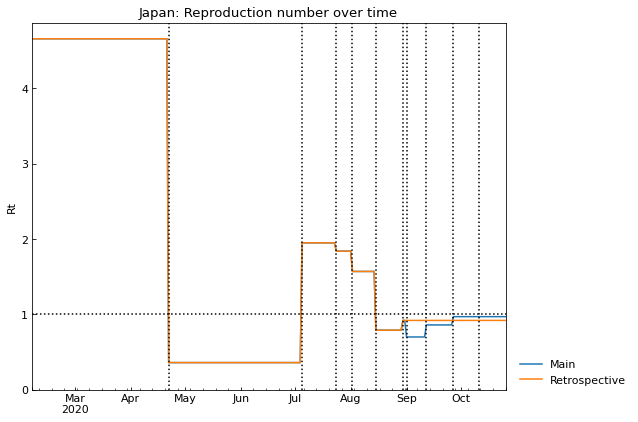

In [48]:
# History of reproduction number
_ = snl_retro.history("Rt")

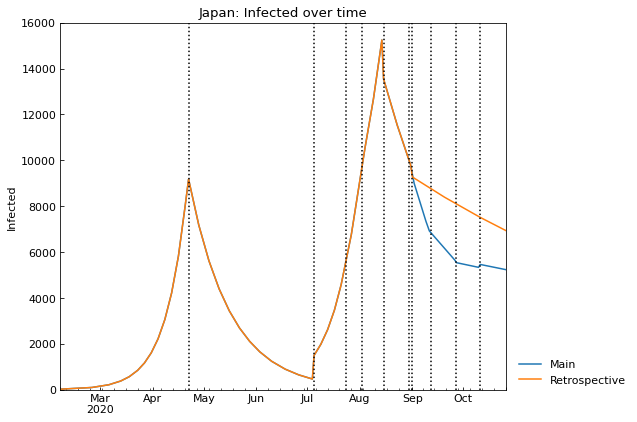

In [49]:
# History of Infected
_ = snl_retro.history("Infected")

In [50]:
# Show the representative values
snl_retro.describe()

,max(Infected),argmax(Infected),Confirmed on 27Oct2020,Infected on 27Oct2020,Fatal on 27Oct2020,7th_Rt,8th_Rt,9th_Rt,10th_Rt
Main,15246,14Aug2020,97414,5221,1712,0.70,0.86,0.97,0.97
Retrospective,15246,14Aug2020,96018,6906,1959,0.92,-,-,-
